In [2]:
import pandas as pd

# se importa el dataset  homicidios la hoja VICTIMAS

Victimas1 = pd.read_excel(r"D:\Users\Cesar\Desktop\Proyecto_individial_1\Siniestros_viales\Data_set\homicidios.xlsx", engine="openpyxl", sheet_name="VICTIMAS")


In [3]:
# Se guarda en un dataframe formato csv para posteriores analisis, trasformaciones y manipulaciones 

Victimas1.to_csv("df_Victimas.csv", index=False)


In [4]:
# Se importa el dataframe creado en el archivo para leerlo 

Victimas = pd.read_csv("D:\\Users\\Cesar\\Desktop\\Proyecto_individial_1\\Siniestros_viales\\EDA\\df_Victimas.csv")


In [5]:
# Se crea un nuevo dataframe en formato csv  

Victimas.to_csv('Victimas.csv', index=False)


In [6]:
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [7]:
#En esta bloque de codigo vamos hacer transformaciones de tipo de datos segun el analisis para facilitar las consultas 
#y las visulizaciones 
#En la siguiente linea de codigo vamos a transformar columnas con tipo de datos "object" a "Category" 
categoricas = ['ROL','VICTIMA','SEXO']
Victimas[categoricas] = Victimas[categoricas].astype('category')

In [8]:
#En la siguiente linea de codigo vamos a transformar columnas con tipo de datos "object" a a tipo 'int' con manejo de errores 
enteros = ['EDAD']
for col in enteros:
    Victimas[col] = pd.to_numeric(Victimas[col], errors='coerce', downcast='integer').fillna(0).astype(int)

In [9]:
# En esta linea de codigo verificamos los cambios con la funcion info()
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID_hecho             717 non-null    object  
 1   FECHA                717 non-null    object  
 2   AAAA                 717 non-null    int64   
 3   MM                   717 non-null    int64   
 4   DD                   717 non-null    int64   
 5   ROL                  717 non-null    category
 6   VICTIMA              717 non-null    category
 7   SEXO                 717 non-null    category
 8   EDAD                 717 non-null    int32   
 9   FECHA_FALLECIMIENTO  717 non-null    object  
dtypes: category(3), int32(1), int64(3), object(3)
memory usage: 39.3+ KB


In [10]:
Victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [11]:
# En esta linea de codigo verificamos que los registros no esten repetidos y nos afecte las mediciones 
Victimas.duplicated(subset=['ID_hecho']).sum()

21

In [12]:
# Debido a que hay valores repetidos en la columna "ID_hecho" y estos deben ser unicos se eliminan los duplicados 
# y se dejan los primeros que aparecen en el df
Victimas.drop_duplicates(subset='ID_hecho', keep='first',inplace=True)

In [13]:
# En esta linea de codigo se realiza analisis de estadistica descriptiva de la Variables numericas 
Victimas.describe()

,AAAA,MM,DD,EDAD
count,696.000000,696.000000,696.000000,696.000000
mean,2018.188218,6.692529,15.943966,39.288793
std,1.683754,3.571309,8.648434,22.057640
min,2016.000000,1.000000,1.000000,0.000000
25%,2017.000000,4.000000,9.000000,25.000000
50%,2018.000000,7.000000,16.000000,35.000000
75%,2020.000000,10.000000,23.000000,55.000000
max,2021.000000,12.000000,31.000000,95.000000


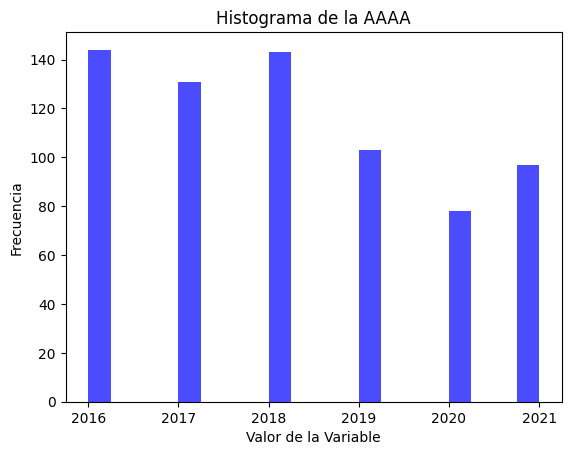

In [14]:
import matplotlib.pyplot as plt
#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable 
# "AAAA" ya que es una variable cuantitativa nos representa el año

# Visualizar el histograma de la variable 'AAAA'
plt.hist(Victimas['AAAA'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de la AAAA')
plt.xlabel('Valor de la Variable')
plt.ylabel('Frecuencia')
plt.show()


Hemos observado una disminución tanto en la cantidad de siniestros como en el número de víctimas mortales desde el año 2016 hasta el 2021. Aunque se registró un ligero repunte en el año 2018 con respecto al año anterior, así como en el 2021 comparado con el año previo, en general, la tendencia es a la baja. Esta información será crucial para análisis futuros y para comprender la evolución de la seguridad vial en ese período.

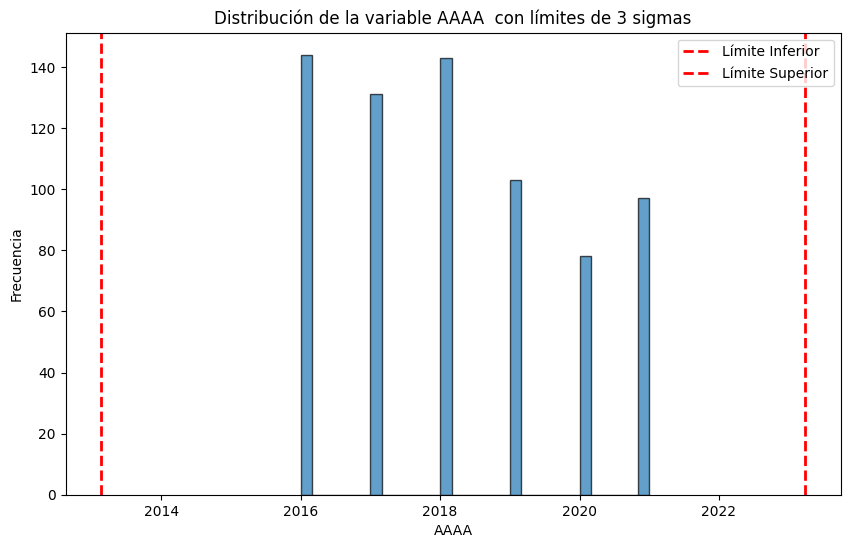

In [15]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "AAAA" qu nos representan los años en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Victimas['AAAA'].mean()
std_hh = Victimas['AAAA'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Victimas[(Victimas['AAAA'] < limite_inferior) | (Victimas['AAAA'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Victimas['AAAA'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable AAAA  con límites de 3 sigmas')
plt.xlabel('AAAA')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Después de aplicar la regla de los tres sigmas para identificar valores atípicos, hemos observado que no se detectaron anomalías. Esta conclusión se confirma al visualizar el gráfico correspondiente, el cual muestra que los datos se encuentran dentro de los límites establecidos por esta regla estadística.Ademas observamos que nos encontramos dentro del rango de años para el analisis.

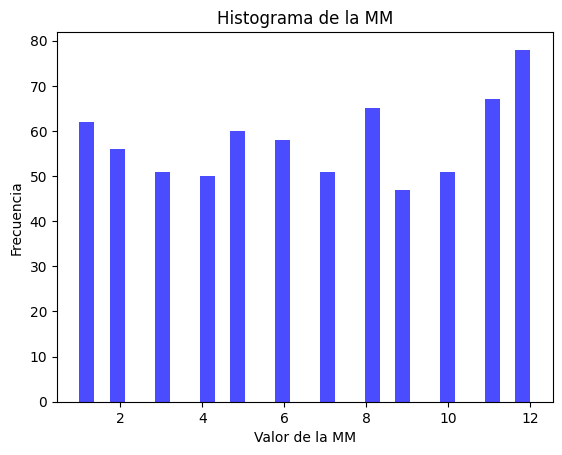

In [16]:
import matplotlib.pyplot as plt
#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable 
# "MM" ya que es una variable cuantitativa nos representa el mes

# Visualizar el histograma de la variable 'AAAA'
plt.hist(Victimas['MM'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de la MM')
plt.xlabel('Valor de la MM')
plt.ylabel('Frecuencia')
plt.show()


Podemos observar que la distribución en el histograma de la variable cuantitativa 'MM' (que representa el mes) es uniforme, con un ligero incremento hacia el mes de diciembre, al final del año, y también al inicio del mismo. Aunque estos incrementos no son muy representativos en comparación con el promedio, podrían ser útiles para análisis posteriores en el contexto del problema a resolver

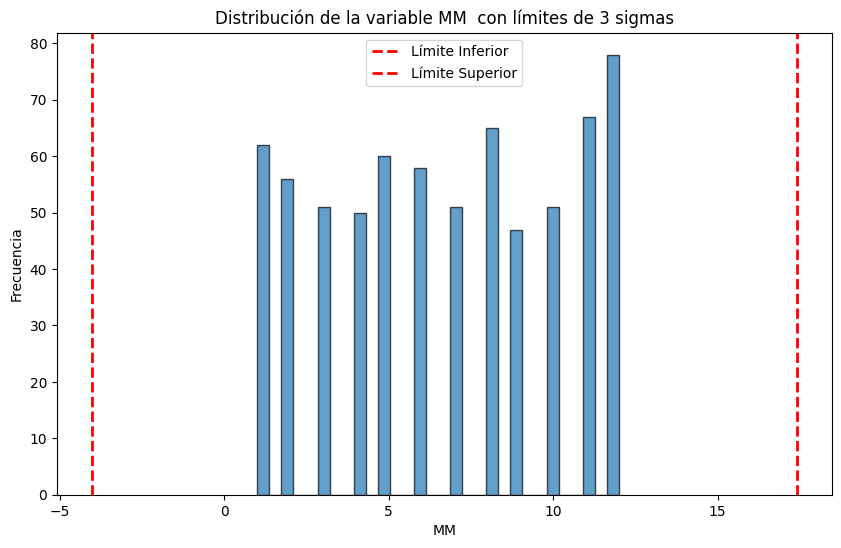

In [17]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "MM" qu nos representan los meses en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Victimas['MM'].mean()
std_hh = Victimas['MM'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Victimas[(Victimas['MM'] < limite_inferior) | (Victimas['MM'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Victimas['MM'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable MM  con límites de 3 sigmas')
plt.xlabel('MM')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Después de aplicar la regla de las tres sigmas para identificar valores atípicos y observar el gráfico, notamos que no hay presencia de tales valores, por lo que no es necesario eliminar datos 

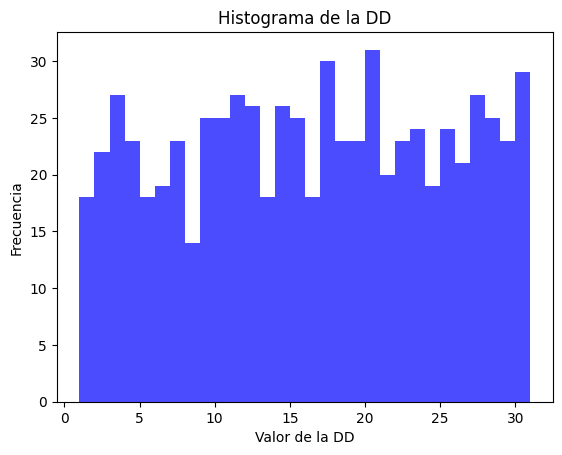

In [18]:
import matplotlib.pyplot as plt
#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable 
# "DD" ya que es una variable cuantitativa nos representa el DIA

# Visualizar el histograma de la variable 'AAAA'
plt.hist(Victimas['DD'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de la DD')
plt.xlabel('Valor de la DD')
plt.ylabel('Frecuencia')
plt.show()


En este histograma, podemos notar que la variable cuantitativa 'DD', que representa el día del siniestro, sigue una distribución uniforme. No se observa un incremento significativo en los siniestros para ningún día o días específicos.

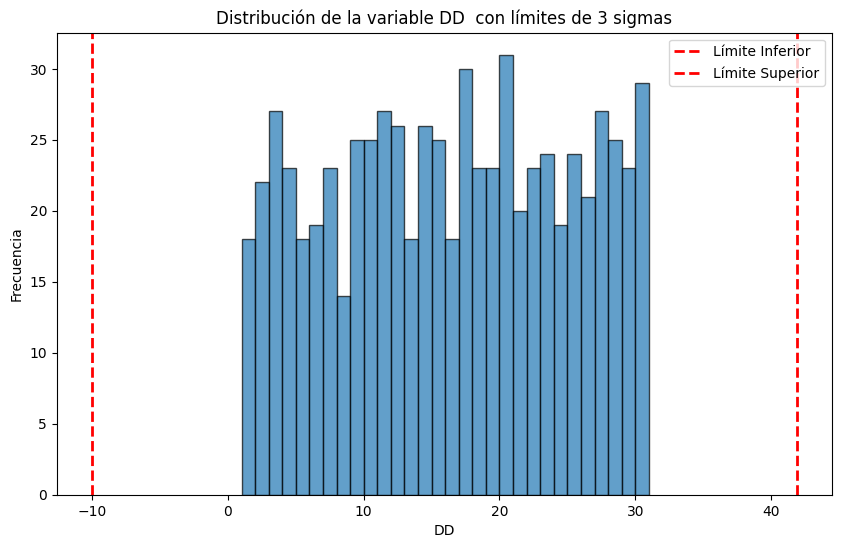

In [19]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "DD" qu nos representan los dias en fecha como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Victimas['DD'].mean()
std_hh = Victimas['DD'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Victimas[(Victimas['DD'] < limite_inferior) | (Victimas['DD'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Victimas['DD'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable DD  con límites de 3 sigmas')
plt.xlabel('DD')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


En el gráfico, podemos observar que no existen valores atípicos en la variable cuantitativa 'días', representada en la columna 'DD'.

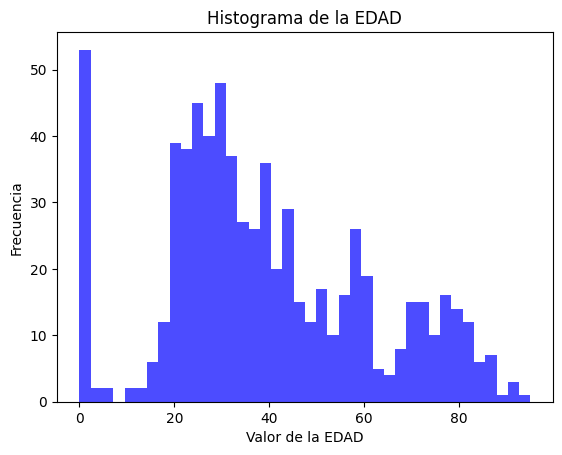

In [20]:
import matplotlib.pyplot as plt
#En este bloque de codigo creamos un histograma para vizulizar la distribucion y posibles valores atipicos de la variable 
# "EDAD" ya que es una variable cuantitativa 

# Visualizar el histograma de la variable 'AAAA'
plt.hist(Victimas['EDAD'], bins=40, color='blue', alpha=0.7)
plt.title('Histograma de la EDAD')
plt.xlabel('Valor de la EDAD')
plt.ylabel('Frecuencia')
plt.show()


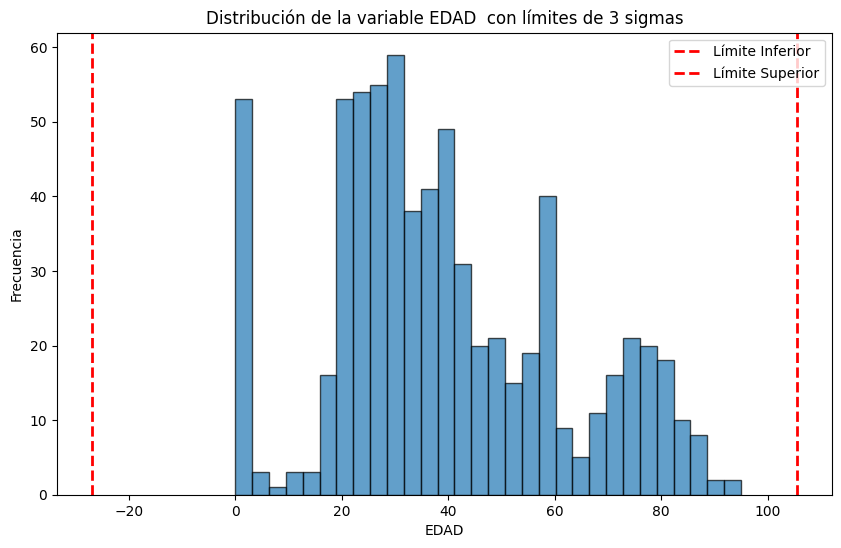

In [21]:
# Buscar valores atipicos o outliers en variables cuantitativas con la regla de las tres sigmas y graficamos 
# Se buscan las medidas de media y desviacion standar de "EDAD" que nos indica edad como tambien 
# Establecer límites para identificar valores atípicos

media_hh = Victimas['EDAD'].mean()
std_hh = Victimas['EDAD'].std()

# Establecer límites para identificar valores atípicos
limite_inferior = media_hh - 3 * std_hh
limite_superior = media_hh + 3 * std_hh

# Identificar valores atípicos
valores_atipicos_hh = Victimas[(Victimas['EDAD'] < limite_inferior) | (Victimas['EDAD'] > limite_superior)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.hist(Victimas['EDAD'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la variable EDAD  con límites de 3 sigmas')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='dashed', linewidth=2, label='Límite Superior')
plt.legend()
plt.show()


Observamos que no se han identificado valores atípicos; sin embargo, con el objetivo de mejorar la relevancia del análisis y facilitar la resolución del problema, decidimos excluir los registros con edades igual a 0. Además, nos centraremos en edades entre 20 y 60 años, ya que, según el gráfico, esta franja de edades presenta la mayor cantidad de víctimas fatales en siniestros.

In [22]:

# Se eliminan las edades menores que 20 años y mañores que 60 años 
Victimas = Victimas[(Victimas['EDAD'] > 20) & (Victimas['EDAD'] < 60)]


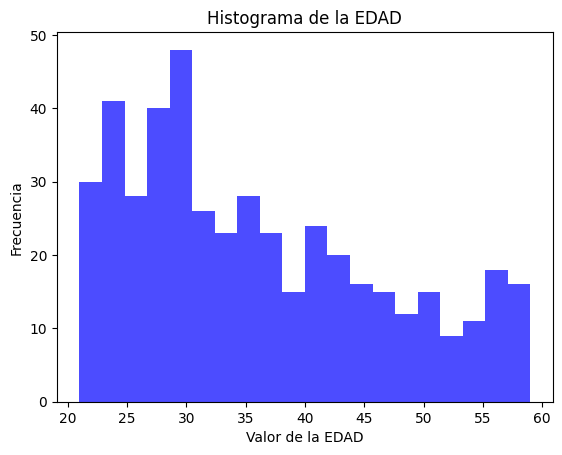

In [23]:


# Visualizar el histograma de la variable 'AAAA'
plt.hist(Victimas['EDAD'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de la EDAD')
plt.xlabel('Valor de la EDAD')
plt.ylabel('Frecuencia')
plt.show()


In [24]:
# utilizamos la funcion  value_counts para contar el numero de frecuencia de cada categoria 

Victimas["ROL"].value_counts()

ROL
CONDUCTOR               273
PEATON                  119
PASAJERO_ACOMPAÑANTE     44
CICLISTA                 19
SD                        3
Name: count, dtype: int64

C:\Users\Cesar\AppData\Local\Temp\ipykernel_3552\4023356898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROL', data=Victimas, palette='pastel')


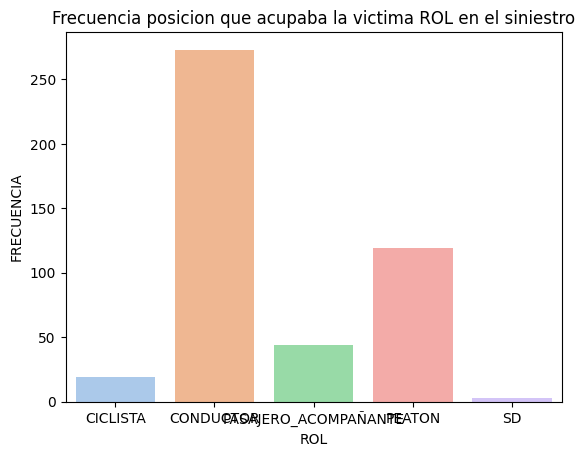

In [25]:
import seaborn as sns

# En este bloque de código creamos un gráfico de barras horizontales 
# para determinar las categorías más relevantes de la variable cualitativa "ROL"
sns.countplot(x='ROL', data=Victimas, palette='pastel')
plt.title('Frecuencia posicion que acupaba la victima ROL en el siniestro')
plt.xlabel('ROL')
plt.ylabel('FRECUENCIA')
plt.show()


l realizar una observación detallada, hemos identificado dos categorías no relevantes, a saber, 'ciclistas' y 'sd'. Por ende, procederemos a filtrar y eliminar estas categorías, ya que no aportan representatividad a nuestro análisis. Para enfocarnos en casos más significativos, nos centraremos únicamente en aquellas categorías con una frecuencia mayor a 60, considerando estos datos para análisis posteriores y la resolución del problema

In [35]:
# Calcula la frecuencia de cada categoría "ROL"
frecuencia_acusado = Victimas['ROL'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 50
categorias_acusado = frecuencia_acusado[frecuencia_acusado> 50].index

# Aplica el filtro al DataFrame original
Victimas = Victimas[Victimas['ROL'].isin(categorias_acusado)]


In [36]:
# Se cuenta la frecuencia de cada categoria variable "ROL" 

Victimas["ROL"].value_counts()

ROL
CONDUCTOR               269
PEATON                  119
CICLISTA                  0
PASAJERO_ACOMPAÑANTE      0
SD                        0
Name: count, dtype: int64

C:\Users\Cesar\AppData\Local\Temp\ipykernel_3552\3501654883.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='VICTIMA', data=Victimas, palette='pastel')


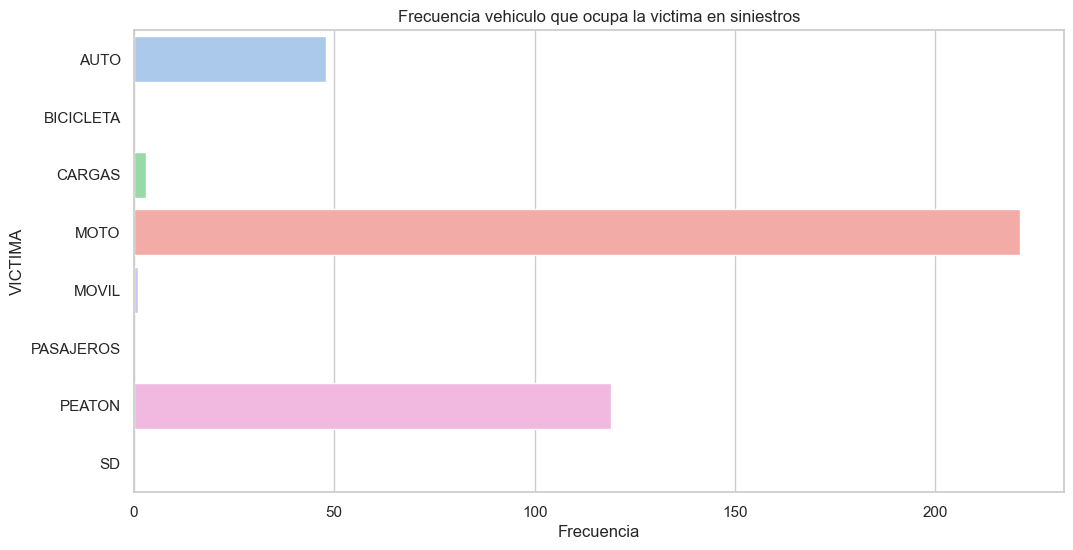

In [28]:
# visulizamos cada categoria para eliminat las menos representativas 
# Configuración para mejorar la visualización del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para la columna "PARTICIPANTES"
sns.countplot(y='VICTIMA', data=Victimas, palette='pastel')

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia vehiculo que ocupa la victima en siniestros')
plt.xlabel('Frecuencia')
plt.ylabel('VICTIMA')

# Mostrar el gráfico
plt.show()


Tras un análisis exhaustivo, hemos constatado que las categorías 'auto', 'moto' y 'peatón' son considerablemente las más representativas. Por este motivo, decidimos no considerar las demás categorías, y procederemos a filtrar aquellas que tengan una frecuencia menor a 80, concentrándonos así en los casos más relevantes para análisis posteriores.

In [37]:
# Calcula la frecuencia de cada categoría "VICTIMA"
frecuencia_victima = Victimas['VICTIMA'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 50
categorias_victima = frecuencia_victima[frecuencia_victima> 40].index

# Aplica el filtro al DataFrame original
Victimas = Victimas[Victimas['VICTIMA'].isin(categorias_victima)]


In [38]:
Victimas["VICTIMA"].value_counts()

VICTIMA
MOTO         221
PEATON       119
AUTO          48
BICICLETA      0
CARGAS         0
MOVIL          0
PASAJEROS      0
SD             0
Name: count, dtype: int64

C:\Users\Cesar\AppData\Local\Temp\ipykernel_3552\1355603302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEXO', data=Victimas, palette='pastel')


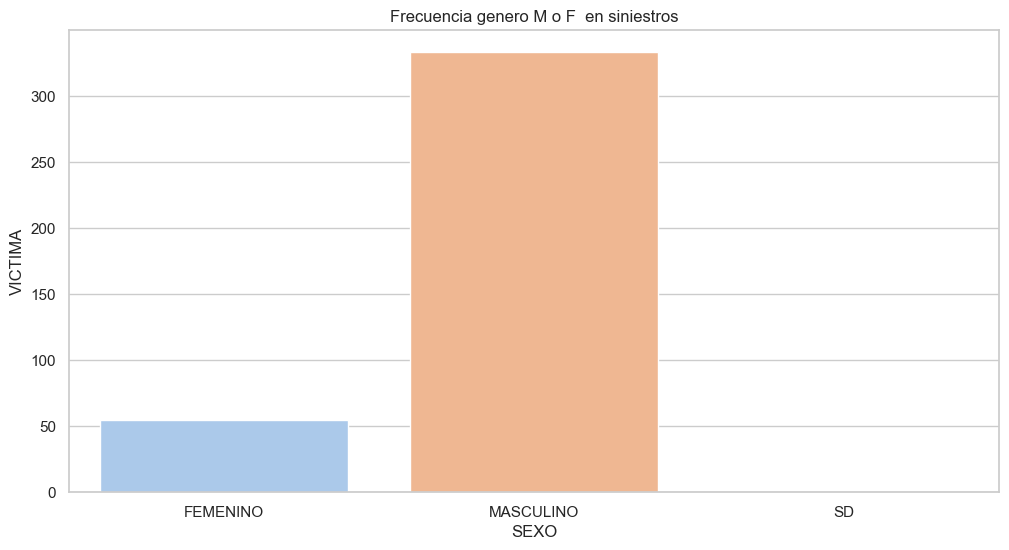

In [39]:
# visulizamos cada categoria para eliminat las menos representativas 
# Configuración para mejorar la visualización del gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para la columna "PARTICIPANTES"
sns.countplot(x='SEXO', data=Victimas, palette='pastel')

# Añadir etiquetas y título al gráfico
plt.title('Frecuencia genero M o F  en siniestros')
plt.xlabel('SEXO')
plt.ylabel('VICTIMA')

# Mostrar el gráfico
plt.show()


Hemos observado que el género masculino presenta una mayor incidencia en fallecimientos en siniestros en comparación con el género femenino. Ambos sexos serán tenidos en cuenta para análisis posteriores y la resolución del problema. En este sentido, procedemos a filtrar y eliminar los casos correspondientes a 'sd', ya que no aportan relevancia a nuestro análisis.

In [40]:
# Calcula la frecuencia de cada categoría "SEXO"
frecuencia_victima = Victimas['SEXO'].value_counts()

# Filtra las filas donde la frecuencia es mayor a 100
categorias_victima = frecuencia_victima[frecuencia_victima> 50].index

# Aplica el filtro al DataFrame original
Victimas = Victimas[Victimas['SEXO'].isin(categorias_victima)]


In [41]:
Victimas["SEXO"].value_counts()

SEXO
MASCULINO    333
FEMENINO      55
SD             0
Name: count, dtype: int64

In [43]:
Victimas.to_csv('Victimas.csv', index=False)

In [44]:
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 2 to 715
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID_hecho             388 non-null    object  
 1   FECHA                388 non-null    object  
 2   AAAA                 388 non-null    int64   
 3   MM                   388 non-null    int64   
 4   DD                   388 non-null    int64   
 5   ROL                  388 non-null    category
 6   VICTIMA              388 non-null    category
 7   SEXO                 388 non-null    category
 8   EDAD                 388 non-null    int32   
 9   FECHA_FALLECIMIENTO  388 non-null    object  
dtypes: category(3), int32(1), int64(3), object(3)
memory usage: 32.7+ KB
